In [4]:
#Dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [7]:
#import scores and stadiums csv files as dataframe

scores_df=pd.read_csv('../project_one/Resources/spreadspoke_scores.csv')
stadium_df=pd.read_csv('../project_one/Resources/nfl_stadiums.csv', encoding="utf-8")

# Check the two dataframes
scores_df.info()
stadium_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13788 entries, 0 to 13787
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   schedule_date        13788 non-null  object 
 1   schedule_season      13788 non-null  int64  
 2   schedule_week        13788 non-null  object 
 3   schedule_playoff     13788 non-null  bool   
 4   team_home            13788 non-null  object 
 5   score_home           13594 non-null  float64
 6   score_away           13594 non-null  float64
 7   team_away            13788 non-null  object 
 8   team_favorite_id     11115 non-null  object 
 9   spread_favorite      11115 non-null  float64
 10  over_under_line      11105 non-null  object 
 11  stadium              13788 non-null  object 
 12  stadium_neutral      13788 non-null  bool   
 13  weather_temperature  12410 non-null  float64
 14  weather_wind_mph     12394 non-null  float64
 15  weather_humidity     8468 non-null  

In [9]:
# Merge scores and stadiums datframes

# The two daraframes have different columns names containg stadium names. Rename one so they match for merging
scores_df.rename(columns = {'stadium':'stadium_name'}, inplace = True)

# Merge two dataframes left on stadium_name
data_df=pd.merge(scores_df, stadium_df, how='left', on='stadium_name' )

#check the merged data
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13788 entries, 0 to 13787
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   schedule_date                    13788 non-null  object 
 1   schedule_season                  13788 non-null  int64  
 2   schedule_week                    13788 non-null  object 
 3   schedule_playoff                 13788 non-null  bool   
 4   team_home                        13788 non-null  object 
 5   score_home                       13594 non-null  float64
 6   score_away                       13594 non-null  float64
 7   team_away                        13788 non-null  object 
 8   team_favorite_id                 11115 non-null  object 
 9   spread_favorite                  11115 non-null  float64
 10  over_under_line                  11105 non-null  object 
 11  stadium_name                     13788 non-null  object 
 12  stadium_neutral   

In [21]:
# Clean data

# Remove columns not being used for this project

# Define columns to be dropped
drop_list=["stadium_elevation", 
           "stadium_azimuthangle", 
           "stadium_weather_station_name",
           "stadium_weather_station",
           "stadium_weather_station_zipcode",
           "stadium_address",
           "stadium_close",
           "stadium_open",
           "over_under_line",
           "spread_favorite",
           "team_favorite_id",
            ]

# Drop the selected columns

#data_df=data_df.drop(drop_list, axis = "columns")
# Drop home/away, keep only neutral site games,  <- dataframe for Super Bowl question (Brian!!!!)
super_bowl_data_df=data_df.loc[data_df['schedule_week']=='Superbowl']

# Drop neutral site games, keep only home/away <- main dataframe for most questions
data_df=data_df.loc[data_df['stadium_neutral']==False]

# Check the dataframe
data_df.info()
super_bowl_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13673 entries, 0 to 13787
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   schedule_date         13673 non-null  object 
 1   schedule_season       13673 non-null  int64  
 2   schedule_week         13673 non-null  object 
 3   schedule_playoff      13673 non-null  bool   
 4   team_home             13673 non-null  object 
 5   score_home            13482 non-null  float64
 6   score_away            13482 non-null  float64
 7   team_away             13673 non-null  object 
 8   stadium_name          13673 non-null  object 
 9   stadium_neutral       13673 non-null  bool   
 10  weather_temperature   12314 non-null  float64
 11  weather_wind_mph      12314 non-null  float64
 12  weather_humidity      8448 non-null   float64
 13  weather_detail        2978 non-null   object 
 14  stadium_location      13673 non-null  object 
 15  stadium_type          13

In [22]:
# Check the dataframe to make sure columns were dropped
data_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 13673 entries, 0 to 13787
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   schedule_date         13673 non-null  object 
 1   schedule_season       13673 non-null  int64  
 2   schedule_week         13673 non-null  object 
 3   schedule_playoff      13673 non-null  bool   
 4   team_home             13673 non-null  object 
 5   score_home            13482 non-null  float64
 6   score_away            13482 non-null  float64
 7   team_away             13673 non-null  object 
 8   stadium_name          13673 non-null  object 
 9   stadium_neutral       13673 non-null  bool   
 10  weather_temperature   12314 non-null  float64
 11  weather_wind_mph      12314 non-null  float64
 12  weather_humidity      8448 non-null   float64
 13  weather_detail        2978 non-null   object 
 14  stadium_location      13673 non-null  object 
 15  stadium_type          13

In [23]:
# Add a empty column home_result
data_df["home_result"]=''

In [25]:
# Move new column over to be beside the home and away scores
data_df=data_df.iloc[:,[0,1,2,3,4,5,6,7,21,8,9,10,11,12,13,14,15,16,17,18,19,20]]

#Check coulmn has been added and is in the correct place
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13673 entries, 0 to 13787
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   schedule_date         13673 non-null  object 
 1   schedule_season       13673 non-null  int64  
 2   schedule_week         13673 non-null  object 
 3   schedule_playoff      13673 non-null  bool   
 4   team_home             13673 non-null  object 
 5   score_home            13482 non-null  float64
 6   score_away            13482 non-null  float64
 7   team_away             13673 non-null  object 
 8   stadium_longitude     11722 non-null  float64
 9   home_result           13673 non-null  object 
 10  stadium_name          13673 non-null  object 
 11  stadium_neutral       13673 non-null  bool   
 12  weather_temperature   12314 non-null  float64
 13  weather_wind_mph      12314 non-null  float64
 14  weather_humidity      8448 non-null   float64
 15  weather_detail        29

In [75]:
# Fill column home_result to show if home team won (W), lost (L) or tied (T) 
# based on relationship between home score and away score

data_df['home_result'] = data_df.apply(lambda x:'Win' if x['score_home'] > x['score_away'] else "Loss or Tie",axis=1)

# Check 
data_df


,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,stadium_longitude,home_result,...,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,stadium_location,stadium_type,stadium_weather_type,stadium_capacity,stadium_surface,stadium_latitude
0,9/2/1966,1966,1,False,Miami Dolphins,14.0,23.0,Oakland Raiders,-80.316300,Loss or Tie,...,83.0,6.0,71.0,NaN,"Miami, FL",outdoor,warm,NaN,NaN,25.790500
1,9/3/1966,1966,1,False,Houston Oilers,45.0,7.0,Denver Broncos,NaN,Win,...,81.0,7.0,70.0,NaN,"Houston, TX",outdoor,warm,NaN,Grass,NaN
2,9/4/1966,1966,1,False,San Diego Chargers,27.0,7.0,Buffalo Bills,NaN,Win,...,70.0,7.0,82.0,NaN,"San Diego, CA",outdoor,warm,NaN,Grass,NaN
3,9/9/1966,1966,2,False,Miami Dolphins,14.0,19.0,New York Jets,-80.316300,Loss or Tie,...,82.0,11.0,78.0,NaN,"Miami, FL",outdoor,warm,NaN,NaN,25.790500
4,9/10/1966,1966,1,False,Green Bay Packers,24.0,3.0,Baltimore Colts,-88.062222,Win,...,64.0,8.0,62.0,NaN,"Green Bay, WI",outdoor,cold,"80,735",Grass,44.501389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13783,1/7/2024,2023,18,False,New Orleans Saints,NaN,NaN,Atlanta Falcons,NaN,Loss or Tie,...,72.0,0.0,NaN,indoor,"New Orleans, LA",indoor,indoor,"76,468",FieldTurf,NaN
13784,1/7/2024,2023,18,False,New York Giants,NaN,NaN,Philadelphia Eagles,-74.074361,Loss or Tie,...,NaN,NaN,NaN,NaN,"East Rutherford, NJ",outdoor,cold,"82,500",FieldTurf,40.813528
13785,1/7/2024,2023,18,False,San Francisco 49ers,NaN,NaN,Los Angeles Rams,-121.970000,Loss or Tie,...,NaN,NaN,NaN,NaN,"Santa Clara, CA",outdoor,moderate,"68,500",Grass,37.403000
13786,1/7/2024,2023,18,False,Tennessee Titans,NaN,NaN,Jacksonville Jaguars,-86.771389,Loss or Tie,...,NaN,NaN,NaN,NaN,"Nashville, TN",outdoor,moderate,"69,143",Grass,36.166389


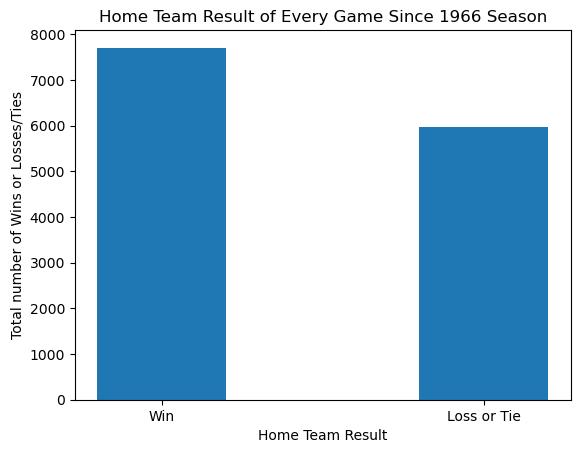

In [72]:
# Bar chart of total home wins and total losses/ties for entire dataset


# Make small dataframe with total numbers of Wins or Losses/Ties from main dataframe
summary=pd.DataFrame(data_df['home_result'].value_counts())



# From small dataframe, grab index and counts for bar graph
result=summary.index
counts=summary['count']

# Plot bar graph
plt.bar(result, counts, width = 0.4)

plt.xlabel('Home Team Result')
plt.ylabel('Total number of Wins or Losses/Ties')
plt.title("Home Team Result of Every Game Since 1966 Season")

plt.show()



In [40]:
mean_weather_temp = data_df.groupby("home_result")["weather_temperature"].mean()
mean_weather_temp
mean_weather_wind = data_df.groupby("home_result")["weather_wind_mph"].mean()
mean_weather_wind
mean_weather_humid = data_df.groupby("home_result")["weather_humidity"].mean()
mean_weather_humid
#home_result = data_df["home_result"]
weather_summary = pd.DataFrame({"Weather Temperature": mean_weather_temp,"Wind Speed": mean_weather_wind, "Humidity": mean_weather_humid})
weather_summary

,Weather Temperature,Wind Speed,Humidity
home_result,,,
Loss or Tie,59.595669,7.398117,67.392787
Win,58.359652,7.816105,67.082670


In [55]:
#weather_type = data_df.set_index("home_result")["stadium_weather_type"]
#weather_type
weather_df = data_df.groupby("home_result")["stadium_weather_type"].value_counts()
weather_df
#warm_weather_win = data_df[(data_df["home_result"] == "Win") & (data_df["stadium_weather_type"] == "warm")]
#cold_weather_win = data_df[(data_df["home_result"] == "Win") & (data_df["stadium_weather_type"] == "cold")]
#indoor_weather_win = data_df[(data_df["home_result"] == "Win") & (data_df["stadium_weather_type"] == "indoor")]
#moderate_weather_win = data_df[(data_df["home_result"] == "Win") & (data_df["stadium_weather_type"] == "moderate")]
#moderate_weather_win

home_result  stadium_weather_type
Loss or Tie  cold                    2507
             indoor                  1332
             moderate                1078
             warm                    1040
Win          cold                    3386
             moderate                1580
             indoor                  1526
             warm                    1206
Name: count, dtype: int64

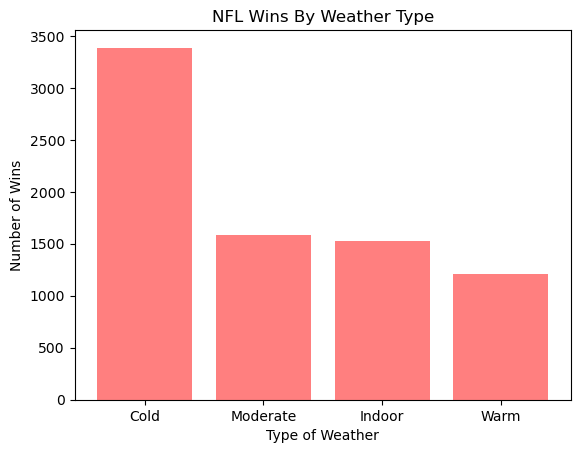

In [57]:
results = [3386, 1580, 1526, 1206]
x_axis = np.arange(len(results))
plt.bar(x_axis, results, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Cold", "Moderate", "Indoor", "Warm"])
plt.title("NFL Wins By Weather Type")
plt.xlabel("Type of Weather")
plt.ylabel("Number of Wins")
plt.show()

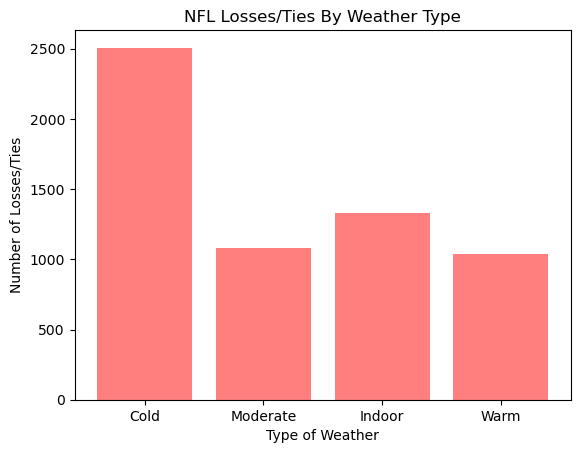

In [58]:
results = [2507, 1078, 1332, 1040]
x_axis = np.arange(len(results))
plt.bar(x_axis, results, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Cold", "Moderate", "Indoor", "Warm"])
plt.title("NFL Losses/Ties By Weather Type")
plt.xlabel("Type of Weather")
plt.ylabel("Number of Losses/Ties")
plt.show()


In [59]:
data_df["home_result"].count()

13673

In [78]:
total_moderate_weather_count = 1580 + 1078
total_moderate_weather = data_df[(data_df["stadium_weather_type"] == "moderate")]
total_moderate_weather
percentage_win_moderate = 1580/total_moderate_weather_count
percentage_win_moderate

0.5944319036869827

In [79]:
overall_win_percent = (3386 + 1580 + 1526 + 1206)/13673 
overall_win_percent

0.5630073868207416

In [103]:
weather_type = data_df["weather_detail"]
weather_type_df = weather_type.dropna()
weather_type_df
#win_indoor = data_df[(data_df["home_result"] == "Win") & (data_df["weather_detail"] == "indoor")].count()["home_result"]
win_indoor = data_df[(data_df["home_result"] == "Win") & (data_df["weather_detail"] == "indoor")].count()["home_result"]
win_indoor
no_win_indoor = data_df[(data_df["home_result"] == "Loss or Tie") & (data_df["weather_detail"] == "indoor")].count()["home_result"]
no_win_indoor
percentage_win_indoor = win_indoor/(win_indoor + no_win_indoor)
percentage_win_indoor

0.53345521023766